# Lab 7 and 8 - HERA *The final showdown*
#### Aidan Berres
#### Physics 434
#### 12/13/20

In [2]:
from pyuvdata import UVData
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [3]:
uv = UVData()
uv.read('hera1.hd5',file_type='uvh5')
p=uv.get_antpairs()
freqs = uv.freq_array[0]*1e-6

In [4]:
bl1=p[506]
d1 = uv.get_data(bl1)
d1.shape

(20, 1536)

## Waterfall plots and single antenna pair plots
Here I am using the Baseline (117,53) to show an example of a Waterfall plot

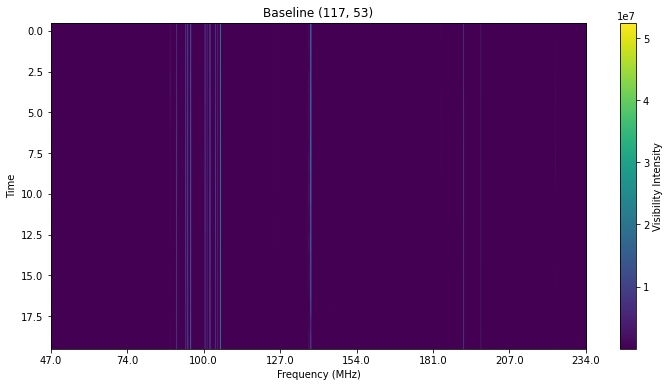

In [5]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.abs(d1),aspect='auto')
cbar = fig.colorbar(im,label='Visibility Intensity')
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
plt.title(f'Baseline {bl1}')
plt.show()

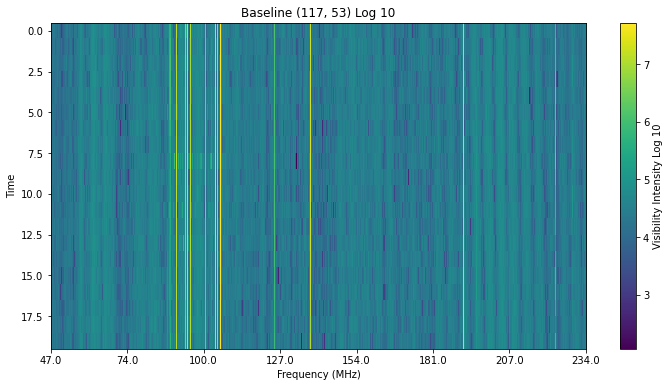

In [6]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.log10(np.abs(d1)),aspect='auto',interpolation='nearest')
cbar = fig.colorbar(im,label='Visibility Intensity Log 10')
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
plt.title(f'Baseline {bl1} Log 10')
plt.show()

We can see that these waterfall plots incorporate time and frequency with the intensity of visibilities corresponding to the colors of the plot.
## Signal removal
Here we define a function (`rm_bkg(bl)`) that I will not rename since I use it too much in this project. Which corresponds to the function $\Delta t = t_{ n+1 } - t_{ n }$ in which we will use for our first baseline sample (117, 53) and then with a subset of all the cross-correlations baselines in this dataset.

In [6]:
def rm_bkg(bl):
    sr1 = []
    for i in range(19):
        sr1.append(bl[i+1]-bl[i])
    sr1=np.array(sr1)
    return sr1

In [7]:
sr1=rm_bkg(d1)

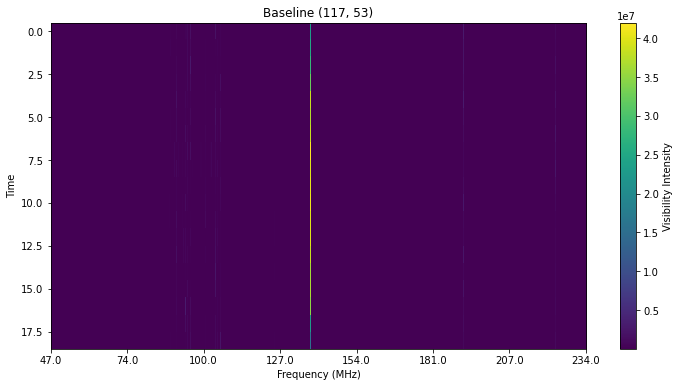

In [10]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.abs(sr1),aspect='auto',interpolation='nearest')
cbar = fig.colorbar(im,label='Visibility Intensity')
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
plt.title(f'Baseline {bl1}')
plt.show()

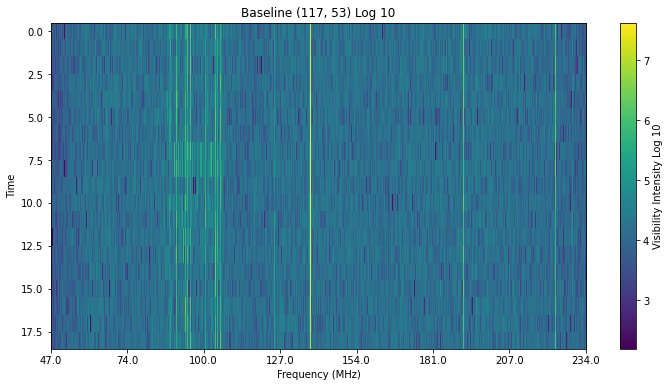

In [44]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.log10(np.abs(sr1)),aspect='auto',interpolation='nearest')
cbar = fig.colorbar(im,label='Visibility Intensity Log 10')
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
plt.title(f'Baseline {bl1} Log 10')
plt.show()

We can see here that most of the constant signals have all been removed. We can also see that a strong difference at around 135 MHz in which a large amount of difference has occured. We will explore this more in the "Feature Exploration" section of this report.

We can see here below how this signal removal process works and how the differences work. We see that we have slight differences in both the $t_{10}$ and $t_{9}$ plots and when we difference them we find that there less signals and that the background becomes more uniform.

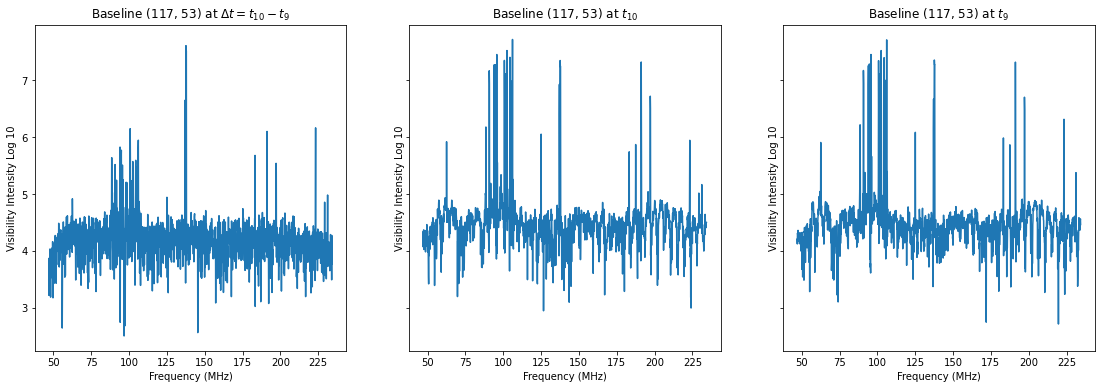

In [144]:
n=9
fig,ax=plt.subplots(1,3,figsize=(19,6),sharey=True)
ax[0].plot(freqs,np.log10(np.abs(sr1[n])))
ax[1].plot(freqs,np.log10(np.abs(d1[n+1])))
ax[2].plot(freqs,np.log10(np.abs(d1[n])))
ax[0].set_xlabel('Frequency (MHz)')
ax[0].set_ylabel('Visibility Intensity Log 10')
ax[1].set_xlabel('Frequency (MHz)')
ax[1].set_ylabel('Visibility Intensity Log 10')
ax[2].set_xlabel('Frequency (MHz)')
ax[2].set_ylabel('Visibility Intensity Log 10')
ax[0].set_title(fr"Baseline {bl1} at $\Delta t = t_{ {n+1} } - t_{ {n} }$",fontsize=12);
ax[1].set_title(fr"Baseline {bl1} at $t_{ {n+1} }$",fontsize=12);
ax[2].set_title(fr"Baseline {bl1} at $t_{ {n} } $",fontsize=12);

## Feature Exploration
Using the Radio Frequency Spectrum Allocation Chart for South Africa, found [here](https://www.ee.co.za/wp-content/uploads/2015/03/csir-035-02-2015_.jpg),
![Image](https://www.ee.co.za/wp-content/uploads/2015/03/csir-035-02-2015_.jpg)

We can see that these bright signals between 87.5 MHz and 108.0 MHz are most likely Broadcasting signals

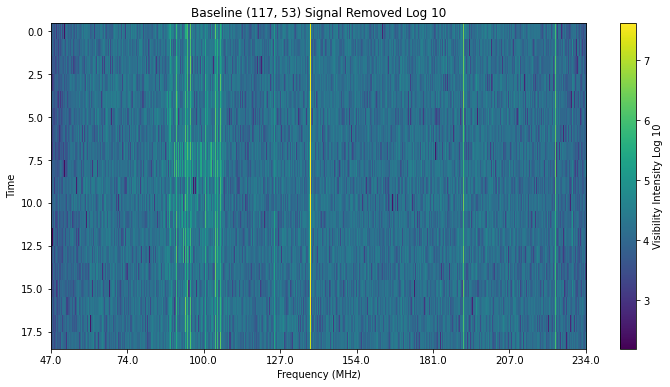

In [32]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.log10(np.abs(sr1)),aspect='auto',interpolation='nearest')
cbar = fig.colorbar(im,label='Visibility Intensity Log 10')
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
plt.title(f'Baseline {bl1} Signal Removed Log 10')
#plt.xlim(300,500)
plt.show()

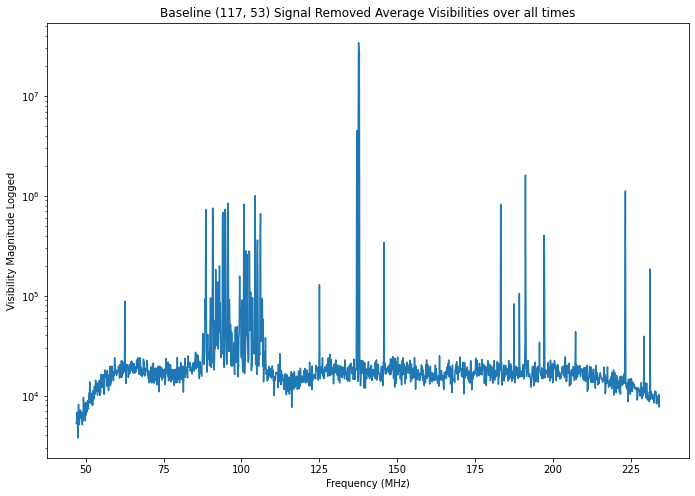

In [37]:
plt.subplots(figsize=(11.5,8))
dav1=np.mean(abs(sr1),axis=0)
plt.plot(freqs,dav1)
plt.yscale('log')
plt.title('Baseline (117, 53) Signal Removed Average Visibilities over all times')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Visibility Magnitude Logged');
#plt.hlines(2e4,freqs[0],freqs[-1],color='red')
#plt.xlim(100,180)

In [60]:
print('The maximum average visibility magnitude is at',freqs[np.argmax(dav1)], "Mhz")

The maximum average visibility magnitude is at 137.6190185546875 Mhz


Using the chart and average plot we can see that we have a large difference at around 137 Mhz which corresponds to "Space Research" and "Meterological Satellite" and other satellite based communications in the frequency chart. We can some other differences in the 175 - 225 MHz range where the chart states are "Broadcasting Signals" thus we can assume a possible reflection off of an airplane or similar phenomena like that.

Here we are plotting the histogram of the summed dataset,

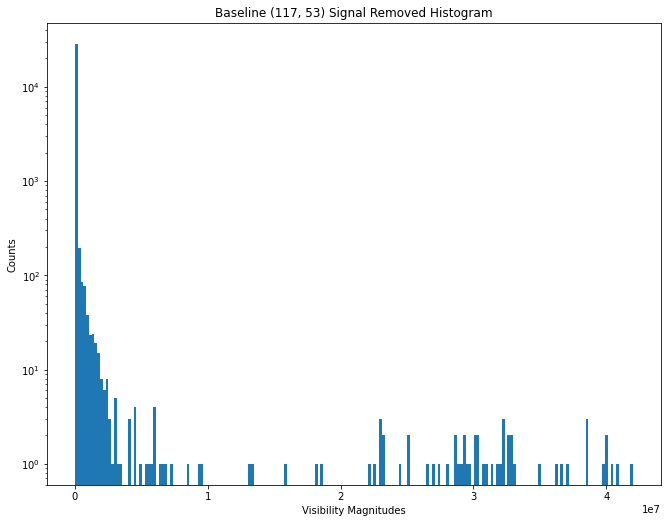

In [71]:
plt.subplots(figsize=(11,8.5))
sr1f=np.abs(sr1).flatten()
#vro1=sr1f[200:1400]
vro1 = sr1f
plt.yscale('log')
n=plt.hist(vro1,bins=200);
#print(n[0].max())
plt.title('Baseline (117, 53) Signal Removed Histogram')
plt.xlabel('Visibility Magnitudes')
plt.ylabel('Counts');

Here we can see that we have a large amount of values that are close to zero with some values of greater magnitudes. We are histogramming the magnitudes so we can see where most of our data points lie, and where are true background is likely to be found.

Here we are taking a histogram of the signal removed (117, 53) Baseline with a cut of values below 6e4 since we know our non-error and non-signal background will probably be below this magnitude value, according to the plot above.

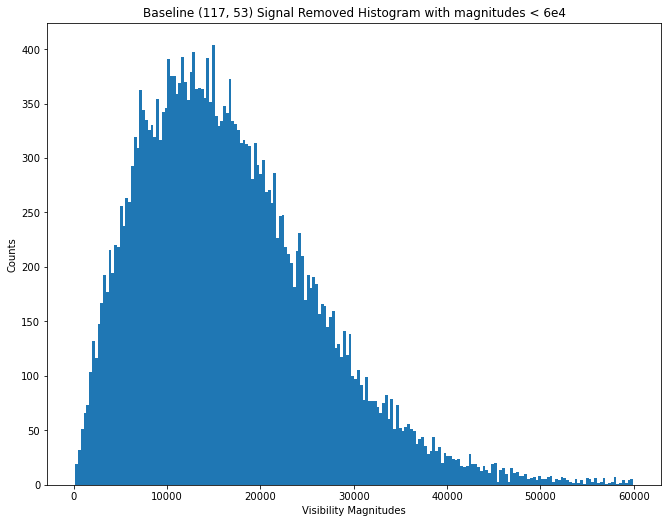

In [63]:
plt.subplots(figsize=(11,8.5))
sr1f=np.abs(sr1).flatten()
#vro1=sr1f[200:1400]
vro1 = sr1f[sr1f < 6e4]
#plt.yscale('log')
n=plt.hist(vro1,bins=200);
#print(n[0].max())
plt.title('Baseline (117, 53) Signal Removed Histogram with magnitudes < 6e4')
plt.xlabel('Visibility Magnitudes')
plt.ylabel('Counts');

We can see that its shape looks like a gamma distribution since we see that there an no negative values and that it is skewed towards the right of the x-axis. We can see that its peak is at around 12000 visibility intensity.

## Average visibility plots

I am using a random sample of 100 cross-correlation baselines from the original list of **630** cross-correlation baslines. Here I am organizing them and doing a signal removal on them, and making them more readable for my further analysis.

In [67]:
print('Number of cross correlation baselines =',len(ns))

Number of cross correlation baselines = 630


In [25]:
#Finding all cross-correlations and sampling 100 Baselines from them
np.random.seed(420)
ns=[]
for i in range(len(p)):
    if p[i][0]!=p[i][1]:
        ns.append(p[i])
rni= np.random.choice(np.arange(len(ns),dtype=int),size=100,replace=False)
npa=np.array(ns)
rns=npa[rni]

In [41]:
#Average non-signal removed
avg1=[]
for i in range(20):
    ma= []
    for j in range(len(rns)):
        sha = abs(uv.get_data(rns[j]))
        ma.append(sha[i])
    ma = np.array(ma)
    mc=ma.mean(axis=0)
    avg1.append(mc)
avg1=np.array(avg1)
avg1.shape

(20, 1536)

In [42]:
#Average signal removed
avg1sr=[]
for i in range(19):
    bt = []
    for j in range(len(rns)):
        d = abs(rm_bkg(uv.get_data(rns[j])))
        bt.append(d[i])
    bt = np.array(bt)
    mc=bt.mean(axis=0)
    avg1sr.append(mc)
avg1sr=np.array(avg1sr)
avg1sr.shape

(19, 1536)

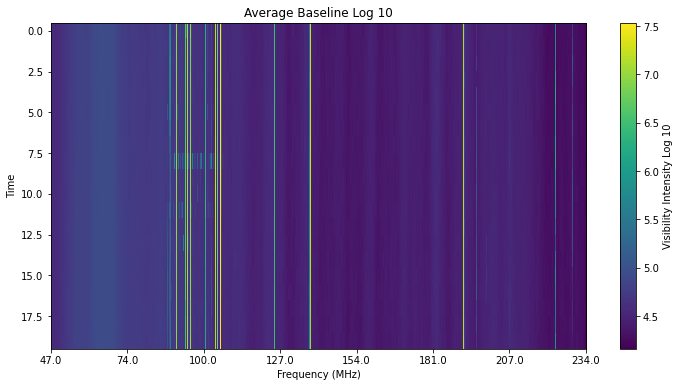

In [65]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.log10(np.abs(avg1)),aspect='auto',interpolation='nearest')
cbar = fig.colorbar(im,label='Visibility Intensity Log 10')
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
plt.title(f'Average Baseline Log 10')
plt.show()

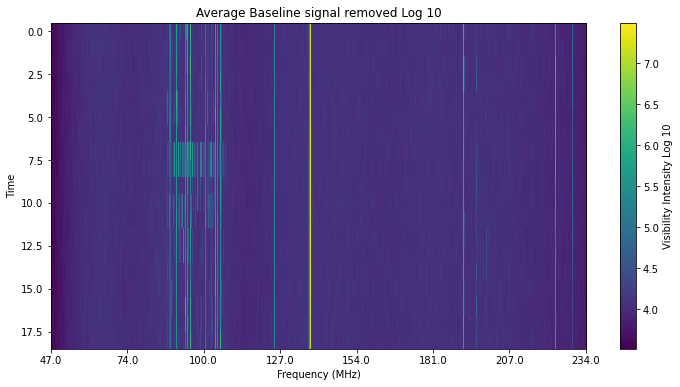

In [64]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.log10(np.abs(avg1sr)),aspect='auto',interpolation='nearest')
cbar = fig.colorbar(im,label='Visibility Intensity Log 10')
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
plt.title(f'Average Baseline signal removed Log 10')
plt.show()

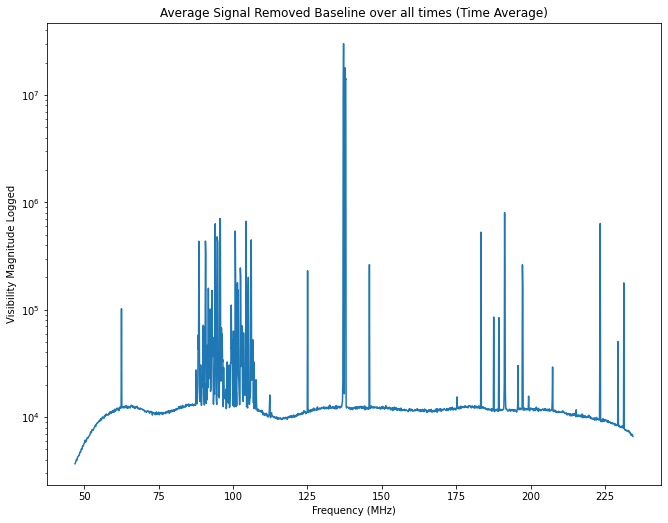

In [68]:
plt.subplots(figsize=(11,8.5))
plt.yscale('log')
plt.plot(freqs,np.abs(np.mean(avg1sr,axis=0)));
plt.title('Average Signal Removed Baseline over all times (Time Average)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Visibility Magnitude Logged');

Here we can see the same features as we did before with the single antenna plots, a large difference at 137 Mhz and smaller differences between 175 - 225 MHz. We have explained these as either Broadcast signals or Satellite communications. We can also see that the background line at around 10^4 is more smoother than the single antenna plot.

## Jackknife plots
Here we are going to do conduct a jackknife test on our averaged basline data. Here we are plotting the time averaged baseline with most of the errors removed i.e. with a certain threshold on the maximum magnitude in the data. I am also histogramming these data points below,

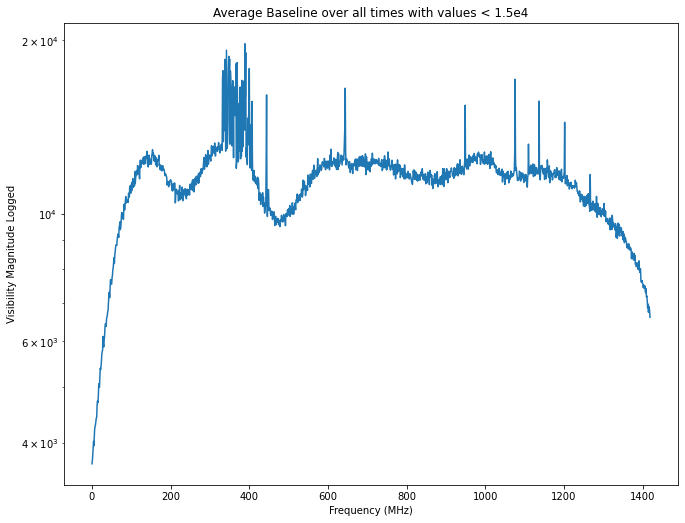

In [78]:
plt.subplots(figsize=(11,8.5))
plt.yscale('log')
hi=np.abs(np.mean(avg1sr,axis=0))
maria1=hi[hi <2e4]
plt.plot(np.arange(len(maria1)),maria1);
plt.title('Average Baseline over all times with values < 1.5e4')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Visibility Magnitude Logged');

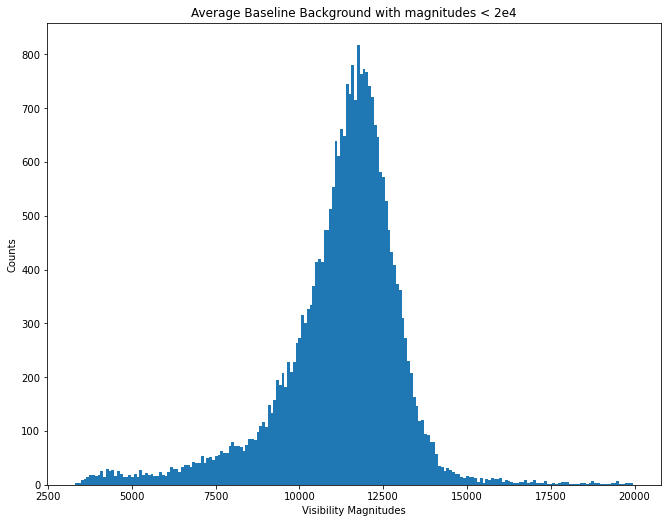

In [79]:
plt.subplots(figsize=(11,8.5))
fl = np.abs(avg1sr.flatten())
vro3 = fl[fl < 2e4]
#plt.yscale('log')
#plt.hist(bt1f,bins=200);
plt.hist(vro3,bins=200)
plt.title('Average Baseline Background with magnitudes < 2e4')
plt.xlabel('Visibility Magnitudes')
plt.ylabel('Counts');

We can see in this preliminary average baseline histogram we can see that there is a peak at around 12000 magnitudes and that we have a much broader wing on the left side of its peak and a smaller wing on its right side.
## a)
My concern is that when we measure the background (no difference signals) will the background change if I measure it at another frequency on the plot?

## b) 
Here we will use signal free frequency slices from 147 MHz - 172 MHz and another cut from 65 Mhz - 83 Mhz which there are no to little difference signals on their background lines.

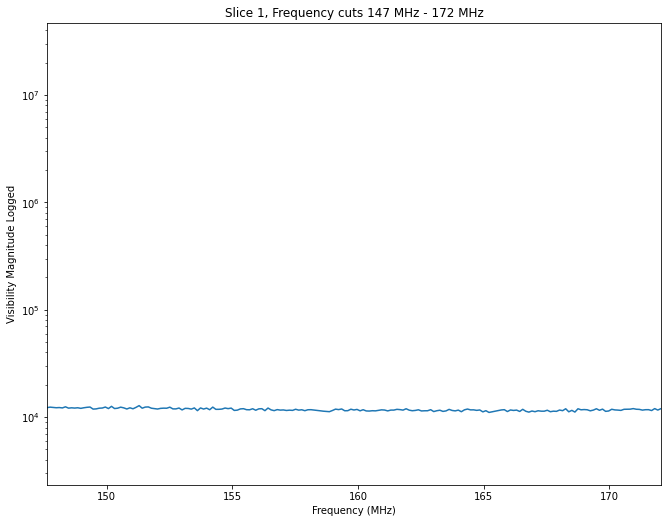

In [95]:
plt.subplots(figsize=(11,8.5))
plt.yscale('log')
plt.plot(freqs,np.abs(np.mean(avg1sr,axis=0)));
plt.xlim(freqs[825],freqs[825+200])
plt.xlabel('Frequency (MHz)')
plt.ylabel('Visibility Magnitude Logged');
plt.title(f'Slice 1, Frequency cuts 147 MHz - 172 MHz');

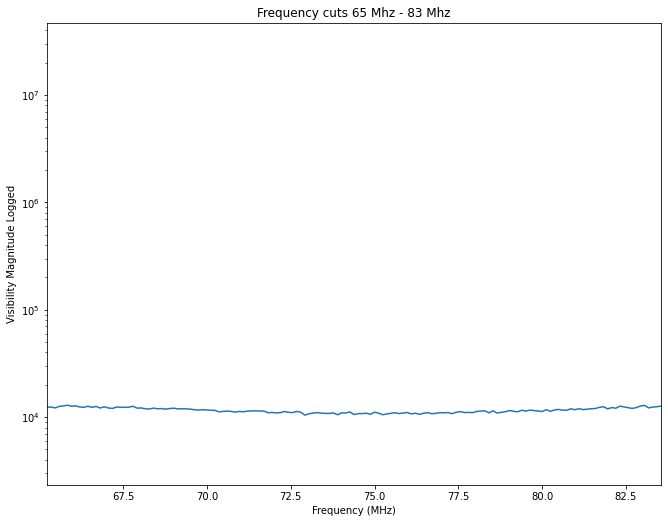

In [77]:
plt.subplots(figsize=(11,8.5))
plt.yscale('log')
plt.plot(freqs,np.abs(np.mean(avg1sr,axis=0)));
plt.xlim(freqs[150],freqs[300])
plt.xlabel('Frequency (MHz)')
plt.ylabel('Visibility Magnitude Logged');
plt.title('SliceFrequency cuts 65 Mhz - 83 Mhz');

## c) 
Here we are calculating the histograms of the data slices above,

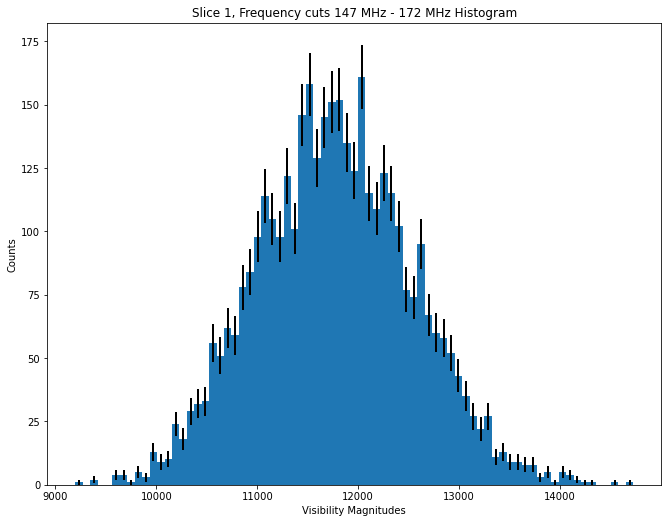

In [86]:
fig,ax=plt.subplots(figsize=(11,8.5))
fl = np.abs((avg1sr[:,825:1025].flatten()))
vro3 = fl#[fl < 8e4]
#plt.yscale('log')
#plt.hist(bt1f,bins=200);
n1,bins,p=plt.hist(vro3,bins=75);
b=bins[:-1]+(bins[1+20]-bins[0+20])/2
plt.errorbar(b,n1,yerr=np.sqrt(n1),elinewidth=2,linewidth=0,color='k');
plt.xlabel('Visibility Magnitudes')
plt.ylabel('Counts');
plt.title('Slice 1, Frequency cuts 147 MHz - 172 MHz Histogram');

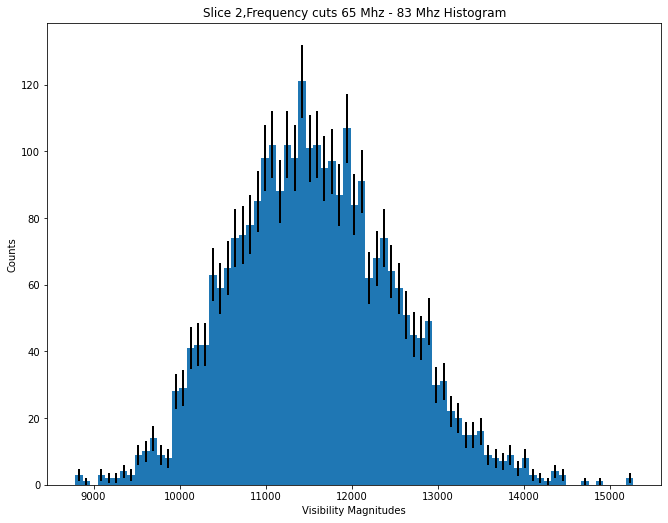

In [87]:
plt.subplots(figsize=(11,8.5))
fl = np.abs(avg1sr[:,150:300].flatten())
vro3 = fl#[fl < n1[1].max()]
#plt.yscale('log')
#plt.hist(bt1f,bins=200);
n2,bins,p=plt.hist(vro3,bins=75);
b=bins[:-1]+(bins[1+20]-bins[0+20])/2
plt.errorbar(b,n2,yerr=np.sqrt(n2),elinewidth=2,linewidth=0,color='k');
plt.xlabel('Visibility Magnitudes')
plt.title('Slice 2,Frequency cuts 65 Mhz - 83 Mhz Histogram');
plt.ylabel('Counts');

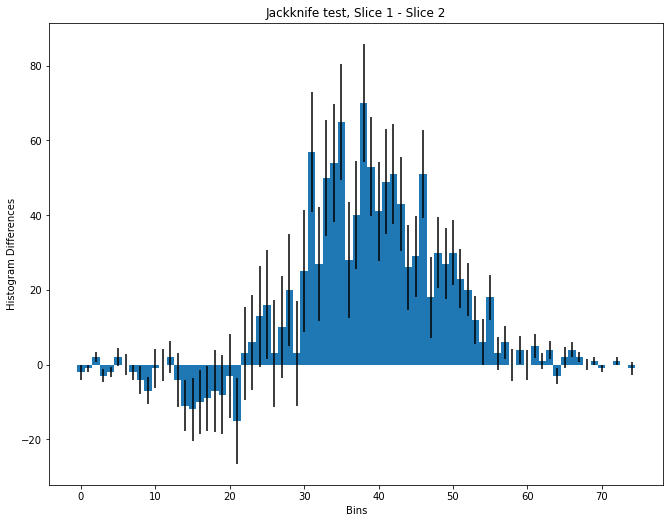

In [89]:
plt.subplots(figsize=(11,8.5))
diff=n1-n2
plt.bar(np.arange(len(diff)),diff,width=1,yerr=np.sqrt(n1+n2))
plt.xlabel('Bins')
plt.title('Jackknife test, Slice 1 - Slice 2')
plt.ylabel('Histogram Differences');

It looks like our test failed since the histogram differences are not within the expected errors. This tells us that our formulated concern is warranted. We can see the differences are most positive in the center of the difference histogram with smaller differences towards the edges. We can see that the Slice 1 histogram (147 MHz - 172 MHz) is much taller than the Slice 2 histogram (65 Mhz - 83 Mhz) and that the Slice 2 histogram is more to the left of the first slice. This is shown by the negative portions on the left side of the difference histogram.
## Data Cuts

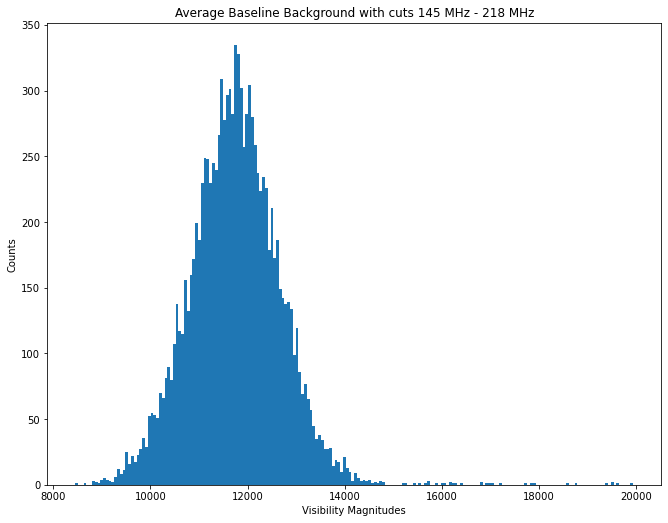

In [94]:
fig,ax=plt.subplots(figsize=(11,8.5))
fl = np.abs((avg1sr[:,800:1400].flatten()))
vro3 = fl[fl < 2e4]
#plt.yscale('log')
#plt.hist(bt1f,bins=200);
n1,bins,p=plt.hist(vro3,bins=200);
plt.title(f'Average Baseline Background with cuts {freqs[800]:0.0f} MHz - {freqs[1400]:0.0f} MHz')
plt.xlabel('Visibility Magnitudes')
plt.ylabel('Counts');

We can see that our data cut from the better background and we find that this becomes much more Gaussian like than before. It is more succinct and slimmer than the inital average visibility histogram with shorter wings. We can see that if we had a candidate signal that it would have far greater significance than before. This is because if we include more data values we find that the wings of the distribution become more broad due to adding more contamination into our histogram. We choose to remove data so we can find a more consistent looking background distribution, with little contamination.